<a href="https://colab.research.google.com/github/bluejay-ai/DeepLearning-TSAI/blob/master/Project4-ArchitecturalBasics/1st_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


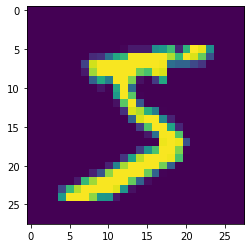

In [78]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [81]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [83]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

**FIRST CODE**

This is my first vanilla code. Here, I am defining my basic architecture. The goal is to achieve 
- 99.4% validation accuracy using less than 15K parameters. 

The concepts applied here are as following :
1. Position of max pooling layers
2. Number of Convolution layers
3. Number of Kernels
4. Achiving Global Receiptive Field equal to size of image
5. ReLu activation 

The First Model acheived validation accuracy of *99.01*% with 14,776 parameters.

In [108]:
from keras.layers import Activation

model = Sequential()
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model.add(Convolution2D(10, 3, 3,activation='relu')) #24
model.add(Convolution2D(20, 3, 3,activation='relu')) #22
model.add(Convolution2D(10, 3, 3,activation='relu')) #20
model.add(MaxPooling2D(pool_size=(2, 2))) #10

model.add(Convolution2D(16, 3, 3,activation='relu')) #8

model.add(Convolution2D(10, 3, 3,activation='relu')) #6
model.add(Convolution2D(20, 3, 3,activation='relu')) #4

model.add(Convolution2D(10, 4,4)) #1

model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

score = model.evaluate(X_test, Y_test, verbose=0)

print(score)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ip

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_303 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_304 (Conv2D)          (None, 24, 24, 10)        2890      
_________________________________________________________________
conv2d_305 (Conv2D)          (None, 22, 22, 20)        1820      
_________________________________________________________________
conv2d_306 (Conv2D)          (None, 20, 20, 10)        1810      
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 10, 10, 10)        0         
_________________________________________________________________
conv2d_307 (Conv2D)          (None, 8, 8, 16)          1456      
_________________________________________________________________
conv2d_308 (Conv2D)          (None, 6, 6, 10)        

In [0]:
y_pred = model.predict(X_test)

In [104]:
print(y_pred[:9])
print(y_test[:9])

[[1.25086086e-09 1.24469923e-09 3.90403407e-08 1.72716128e-07
  1.26675640e-11 1.17200849e-09 4.73682085e-15 9.99999762e-01
  8.83600859e-10 1.84489526e-08]
 [3.86065011e-08 5.31040878e-10 1.00000000e+00 2.58421539e-13
  2.33468084e-12 4.02942762e-13 3.30003544e-08 2.06277431e-16
  1.96419381e-10 1.43492294e-14]
 [2.39785902e-09 9.99998569e-01 2.64920974e-10 4.97257275e-08
  4.37571174e-07 5.92102140e-07 2.63120086e-07 1.13524983e-07
  5.81139794e-08 4.93869112e-10]
 [9.99980330e-01 1.30831425e-18 3.46756490e-09 1.49709745e-10
  1.10153907e-10 2.05025885e-10 1.96955862e-05 1.41442760e-11
  2.69789613e-09 2.43892240e-09]
 [8.05117306e-09 1.02115321e-11 8.25879621e-13 3.94001368e-12
  9.99995470e-01 9.37630529e-10 2.04139701e-06 4.02260582e-13
  1.30786668e-06 1.22754614e-06]
 [2.56451327e-09 9.99997020e-01 2.52607379e-09 2.26379683e-07
  1.73683009e-06 2.22310433e-07 7.26312166e-08 3.34581870e-07
  3.23251300e-07 3.75580766e-09]
 [1.98603848e-17 1.06836907e-10 5.04858437e-14 1.75965640e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

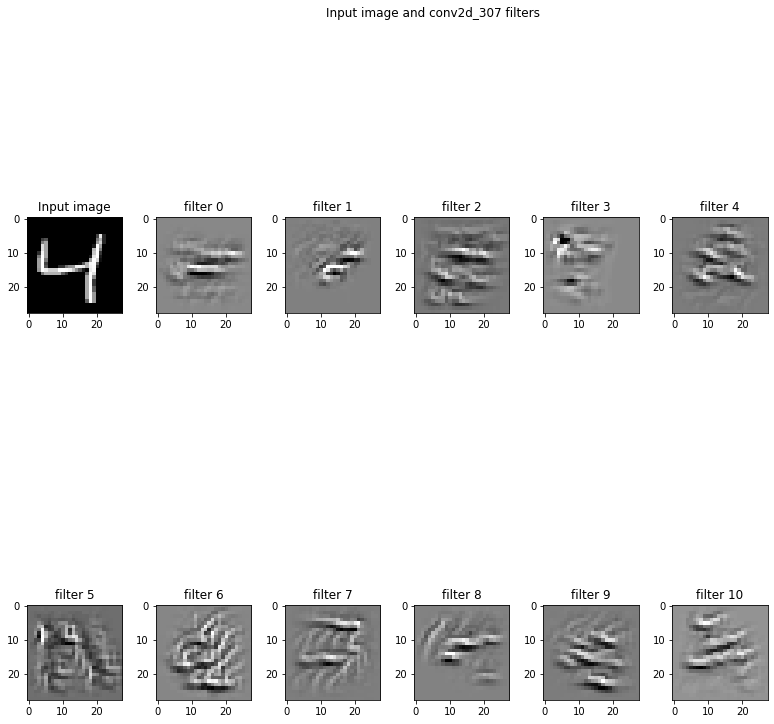

In [112]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_307'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

**SECOND CODE**

This is my second code. The basic architecture is defined in the first layer. The goal is to achieve

99.4% validation accuracy using less than 15K parameters.
The concepts applied here are as following :

> Large Batch Size

The First Model acheived validation accuracy of 99.01% with 14,776 parameters.

The First Model with larger batch size (96) achieved 98.92% accuracy with 14,776 parameters.

In [114]:
from keras.layers import Activation

model2 = Sequential()
model2.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model2.add(Convolution2D(10, 3, 3,activation='relu')) #24
model2.add(Convolution2D(20, 3, 3,activation='relu')) #22
model2.add(Convolution2D(10, 3, 3,activation='relu')) #20
model2.add(MaxPooling2D(pool_size=(2, 2))) #10

model2.add(Convolution2D(16, 3, 3,activation='relu')) #8

model2.add(Convolution2D(10, 3, 3,activation='relu')) #6
model2.add(Convolution2D(20, 3, 3,activation='relu')) #4

model2.add(Convolution2D(10, 4,4)) #1

model2.add(Flatten())
model2.add(Activation('softmax'))

model2.summary()

model2.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model2.fit(X_train, Y_train, batch_size=96, nb_epoch=10, verbose=1)

score = model2.evaluate(X_test, Y_test, verbose=0)

print(score)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ip

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_319 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_320 (Conv2D)          (None, 24, 24, 10)        2890      
_________________________________________________________________
conv2d_321 (Conv2D)          (None, 22, 22, 20)        1820      
_________________________________________________________________
conv2d_322 (Conv2D)          (None, 20, 20, 10)        1810      
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 10, 10, 10)        0         
_________________________________________________________________
conv2d_323 (Conv2D)          (None, 8, 8, 16)          1456      
_________________________________________________________________
conv2d_324 (Conv2D)          (None, 6, 6, 10)        

**THIRD CODE**

This is my code. The basic architecture is defined in the first layer. The goal is to achieve

99.4% validation accuracy using less than 15K parameters.
The concepts applied here are as following :

> Batch Normalization

The First Model acheived validation accuracy of 99.01% with 14,776 parameters.

The Second Model (First Model with larger batch size (96)) achieved 98.92% accuracy with 14,776 parameters.

The Third Model (Second Model with larger batch normalization) achieved 98.98% accuracy with 14,960 parameters.

In [116]:
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D

model3 = Sequential()
model3.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model3.add(Convolution2D(10, 3, 3,activation='relu')) #24
model3.add(BatchNormalization())

model3.add(Convolution2D(20, 3, 3,activation='relu')) #22
model3.add(Convolution2D(10, 3, 3,activation='relu')) #20
model3.add(BatchNormalization())

model3.add(MaxPooling2D(pool_size=(2, 2))) #10

model3.add(Convolution2D(16, 3, 3,activation='relu')) #8
model3.add(BatchNormalization())

model3.add(Convolution2D(10, 3, 3,activation='relu')) #6
model3.add(BatchNormalization())

model3.add(Convolution2D(20, 3, 3,activation='relu')) #4

model3.add(Convolution2D(10, 4,4)) #1

model3.add(Flatten())
model3.add(Activation('softmax'))

model3.summary()

model3.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model3.fit(X_train, Y_train, batch_size=96, nb_epoch=10, verbose=1)

score = model3.evaluate(X_test, Y_test, verbose=0)

print(score)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_329 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_330 (Conv2D)          (None, 24, 24, 10)        2890      
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 10)        40        
_________________________________________________________________
conv2d_331 (Conv2D)          (None, 22, 22, 20)        1820      
_________________________________________________________________
conv2d_332 (Conv2D)          (None, 20, 20, 10)        1810      
_________________________________________________________________
batch_normalization_2 (Batch (None, 20, 20, 10)        40        
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 10, 10, 10)      

**FOURTH CODE**

This is my fourth code. The basic architecture is defined in the first layer. The goal is to achieve

99.4% validation accuracy using less than 15K parameters.
The concepts applied here are as following :

> Dropout

The First Model acheived validation accuracy of 99.01% with 14,776 parameters.

The Second Model (First Model with larger batch size (96)) achieved 98.92% accuracy with 14,776 parameters.

The Third Model (Second Model with larger batch normalization) achieved 98.98% accuracy with 14,868 parameters.

The Fourth Model (Third Model with larger dropout) achieved 99.14% accuracy with 14,868 parameters.


In [119]:
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D

model4 = Sequential()
model4.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model4.add(Convolution2D(10, 3, 3,activation='relu')) #24
model4.add(BatchNormalization())
model4.add(Dropout(0.25))

model4.add(Convolution2D(20, 3, 3,activation='relu')) #22
model4.add(Convolution2D(10, 3, 3,activation='relu')) #20
model4.add(BatchNormalization())
model4.add(Dropout(0.25))

model4.add(MaxPooling2D(pool_size=(2, 2))) #10

model4.add(Convolution2D(16, 3, 3,activation='relu')) #8
model4.add(BatchNormalization())
model4.add(Dropout(0.25))

model4.add(Convolution2D(10, 3, 3,activation='relu')) #6
model4.add(BatchNormalization())
model4.add(Dropout(0.25))

model4.add(Convolution2D(20, 3, 3,activation='relu')) #4

model4.add(Convolution2D(10, 4,4)) #1

model4.add(Flatten())
model4.add(Activation('softmax'))

model4.summary()

model4.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model4.fit(X_train, Y_train, batch_size=96, nb_epoch=10, verbose=1)

score = model4.evaluate(X_test, Y_test, verbose=0)

print(score)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-pack

Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_353 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_354 (Conv2D)          (None, 24, 24, 10)        2890      
_________________________________________________________________
batch_normalization_13 (Batc (None, 24, 24, 10)        40        
_________________________________________________________________
dropout_9 (Dropout)          (None, 24, 24, 10)        0         
_________________________________________________________________
conv2d_355 (Conv2D)          (None, 22, 22, 20)        1820      
_________________________________________________________________
conv2d_356 (Conv2D)          (None, 20, 20, 10)        1810      
_________________________________________________________________
batch_normalization_14 (Batc (None, 20, 20, 10)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/10
60000/60000 [==============================] - 13s 212us/step - loss: 0.3566 - acc: 0.8854
Epoch 2/10
60000/60000 [==============================] - 7s 113us/step - loss: 0.0979 - acc: 0.9695
Epoch 3/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.0720 - acc: 0.9773
Epoch 4/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.0593 - acc: 0.9815
Epoch 5/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.0558 - acc: 0.9831
Epoch 6/10
60000/60000 [==============================] - 7s 114us/step - loss: 0.0512 - acc: 0.9837
Epoch 7/10
60000/60000 [==============================] - 7s 114us/step - loss: 0.0464 - acc: 0.9857
Epoch 8/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.0416 - acc: 0.9869
Epoch 9/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.0422 - acc: 0.9866
Epoch 10/10
60000/60000 [==============================] - 7s 113us/step - loss: 0.0399 - 

**FIFTH CODE**

This is my fifth code. The basic architecture is defined in the first layer. The goal is to achieve

99.4% validation accuracy using less than 15K parameters. The concepts applied here are as following :

> Learning Rate Scheduler

The First Model acheived validation accuracy of 99.01% with 14,776 parameters.

The Second Model (First Model with larger batch size (96)) achieved 98.92% accuracy with 14,776 parameters.

The Third Model (Second Model with larger batch normalization) achieved 98.98% accuracy with 14,868 parameters.

The Fourth Model (Third Model with larger dropout) achieved 99.1% accuracy with 14,868 parameters.

The Fifth Model (Fourth Model with learning rate scheduler) achieved 99.04% accuracy with 14,868 parameters.

In [130]:
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
model5 = Sequential()
model5.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model5.add(Convolution2D(10, 3, 3,activation='relu')) #24
model5.add(BatchNormalization())
model5.add(Dropout(0.25))

model5.add(Convolution2D(20, 3, 3,activation='relu')) #22
model5.add(Convolution2D(10, 3, 3,activation='relu')) #20
model5.add(BatchNormalization())
model5.add(Dropout(0.25))

model5.add(MaxPooling2D(pool_size=(2, 2))) #10

model5.add(Convolution2D(16, 3, 3,activation='relu')) #8
model5.add(BatchNormalization())
model5.add(Dropout(0.25))

model5.add(Convolution2D(10, 3, 3,activation='relu')) #6
model5.add(BatchNormalization())
model5.add(Dropout(0.25))

model5.add(Convolution2D(20, 3, 3,activation='relu')) #4

model5.add(Convolution2D(10, 4,4)) #1

model5.add(Flatten())
model5.add(Activation('softmax'))

model5.summary()

from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model5.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model5.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

score5 = model5.evaluate(X_test, Y_test, verbose=0)

print(score5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher

Model: "sequential_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_441 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_442 (Conv2D)          (None, 24, 24, 10)        2890      
_________________________________________________________________
batch_normalization_57 (Batc (None, 24, 24, 10)        40        
_________________________________________________________________
dropout_53 (Dropout)         (None, 24, 24, 10)        0         
_________________________________________________________________
conv2d_443 (Conv2D)          (None, 22, 22, 20)        1820      
_________________________________________________________________
conv2d_444 (Conv2D)          (None, 20, 20, 10)        1810      
_________________________________________________________________
batch_normalization_58 (Batc (None, 20, 20, 10)      

**SIXTH CODE**

Now we have all parameters added to our model. Let's try to achieve same accuracy with lesser number of parameters.

The model achieved 98.78% accuracy with 7250 parameters.

In [131]:
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
model6 = Sequential()
model6.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model6.add(Convolution2D(10, 3, 3,activation='relu')) #24
model6.add(BatchNormalization())
model6.add(Dropout(0.25))

model6.add(Convolution2D(10, 3, 3,activation='relu')) #22
model6.add(Convolution2D(10, 3, 3,activation='relu')) #20
model6.add(BatchNormalization())
model6.add(Dropout(0.25))

model6.add(MaxPooling2D(pool_size=(2, 2))) #10

model6.add(Convolution2D(10, 3, 3,activation='relu')) #8
model6.add(BatchNormalization())
model6.add(Dropout(0.25))

model6.add(Convolution2D(10, 3, 3,activation='relu')) #6
model6.add(BatchNormalization())
model6.add(Dropout(0.25))

model6.add(Convolution2D(10, 3, 3,activation='relu')) #4

model6.add(Convolution2D(10, 4,4)) #1

model6.add(Flatten())
model6.add(Activation('softmax'))

model6.summary()

from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model6.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model6.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

score6 = model6.evaluate(X_test, Y_test, verbose=0)

print(score6)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher

Model: "sequential_62"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_449 (Conv2D)          (None, 26, 26, 10)        100       
_________________________________________________________________
conv2d_450 (Conv2D)          (None, 24, 24, 10)        910       
_________________________________________________________________
batch_normalization_61 (Batc (None, 24, 24, 10)        40        
_________________________________________________________________
dropout_57 (Dropout)         (None, 24, 24, 10)        0         
_________________________________________________________________
conv2d_451 (Conv2D)          (None, 22, 22, 10)        910       
_________________________________________________________________
conv2d_452 (Conv2D)          (None, 20, 20, 10)        910       
_________________________________________________________________
batch_normalization_62 (Batc (None, 20, 20, 10)      

**SEVENTH CODE**
Let's use sixth model and change the optimizer to SGD.
The accuracy is 92.29%

In [138]:
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from keras import optimizers

model7 = Sequential()
model7.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model7.add(Convolution2D(10, 3, 3,activation='relu')) #24
model7.add(BatchNormalization())
model7.add(Dropout(0.25))

model7.add(Convolution2D(10, 3, 3,activation='relu')) #22
model7.add(Convolution2D(10, 3, 3,activation='relu')) #20
model7.add(BatchNormalization())
model7.add(Dropout(0.25))

model7.add(MaxPooling2D(pool_size=(2, 2))) #10

model7.add(Convolution2D(10, 3, 3,activation='relu')) #8
model7.add(BatchNormalization())
model7.add(Dropout(0.25))
model7.add(Convolution2D(10, 3, 3,activation='relu')) #6
model7.add(BatchNormalization())
model7.add(Dropout(0.25))

model7.add(Convolution2D(10, 3, 3,activation='relu')) #4

model7.add(Convolution2D(10, 4,4)) #1

model7.add(Flatten())
model7.add(Activation('softmax'))

model7.summary()

from keras.optimizers import SGD
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)
sgd = optimizers.SGD(lr=0.003)

model7.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

model7.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

score7 = model7.evaluate(X_test, Y_test, verbose=0)

print(score7)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` cal

Model: "sequential_69"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_508 (Conv2D)          (None, 26, 26, 10)        100       
_________________________________________________________________
conv2d_509 (Conv2D)          (None, 24, 24, 10)        910       
_________________________________________________________________
batch_normalization_89 (Batc (None, 24, 24, 10)        40        
_________________________________________________________________
dropout_85 (Dropout)         (None, 24, 24, 10)        0         
_________________________________________________________________
conv2d_510 (Conv2D)          (None, 22, 22, 10)        910       
_________________________________________________________________
conv2d_511 (Conv2D)          (None, 20, 20, 10)        910       
_________________________________________________________________
batch_normalization_90 (Batc (None, 20, 20, 10)      